# Predicting diabetes using machine learning

we're going to take the following approach:

1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

#### Information about dataset attributes

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

## Preparing the tools
 we're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [2]:
# Import all the tools which we will use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for displaying plots in our notebook
%matplotlib inline

# Models we are going to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay, roc_curve, auc 

## Load the data

In [4]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
# Let's find out how many of each class there
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

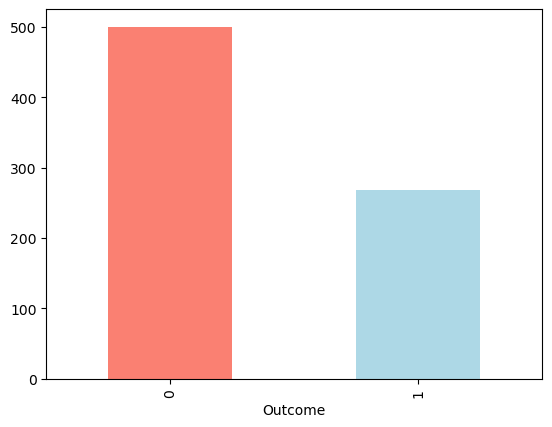

In [7]:
df['Outcome'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# check for any missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
## Diabetes frequency according to pregnancies
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [13]:
# Compare Outcome column with Pregnancies column
pd.crosstab(df.Outcome,df.Pregnancies)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


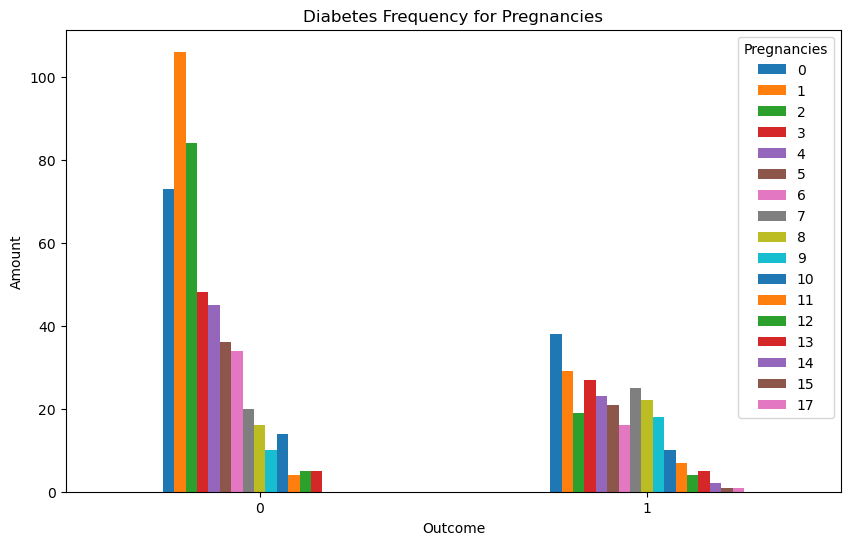

In [17]:
# Create a plot of crosstab
pd.crosstab(df.Outcome,df.Pregnancies).plot(kind="bar",figsize=(10,6))
plt.title("Diabetes Frequency for Pregnancies")
# plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend=False
plt.xticks(rotation=0);

### Pregnancies vs BloodPressure for diabetes

TypeError: 'bool' object is not callable

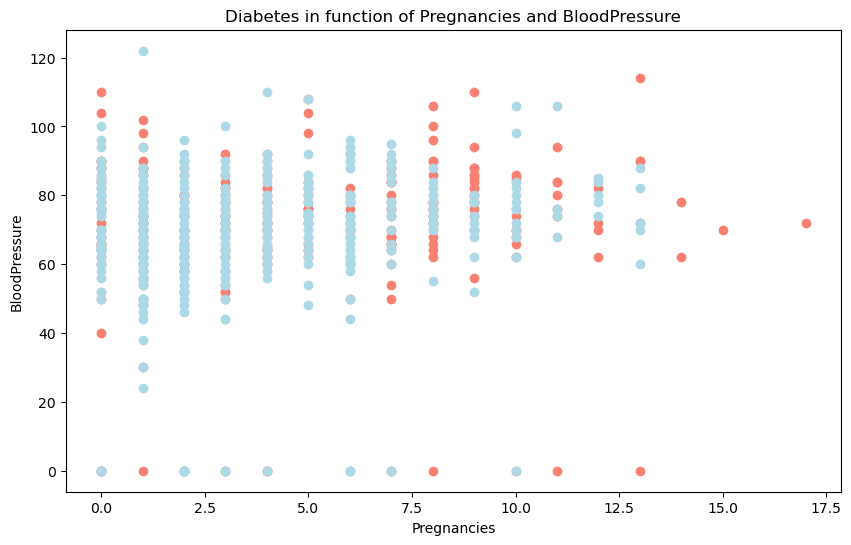

In [23]:
# Create a figure
plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df.Pregnancies[df.Outcome==1],
           df.BloodPressure[df.Outcome==1],
           c='salmon' 
           )

# Scatter with negative example
plt.scatter(df.Pregnancies[df.Outcome==0],
           df.BloodPressure[df.Outcome==0],
           c='lightblue' 
           );

# Add some helpful info
plt.title("Diabetes in function of Pregnancies and BloodPressure")
plt.xlabel("Pregnancies")
plt.ylabel("BloodPressure");
plt.legend(["Disease","No Disease"]);

### Pregnancies vs Age for diabetes

TypeError: 'bool' object is not callable

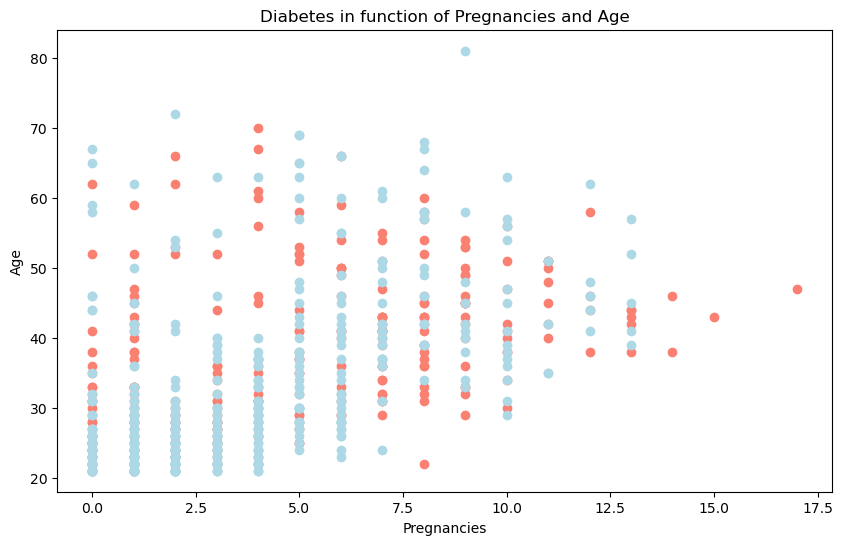

In [25]:
# Create a figure
plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df.Pregnancies[df.Outcome==1],
           df.Age[df.Outcome==1],
           c='salmon' 
           )

# Scatter with negative example
plt.scatter(df.Pregnancies[df.Outcome==0],
           df.Age[df.Outcome==0],
           c='lightblue' 
           );

# Add some helpful info
plt.title("Diabetes in function of Pregnancies and Age")
plt.xlabel("Pregnancies")
plt.ylabel("Age");
plt.legend(["Disease","No Disease"]);

In [26]:
# Make a correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


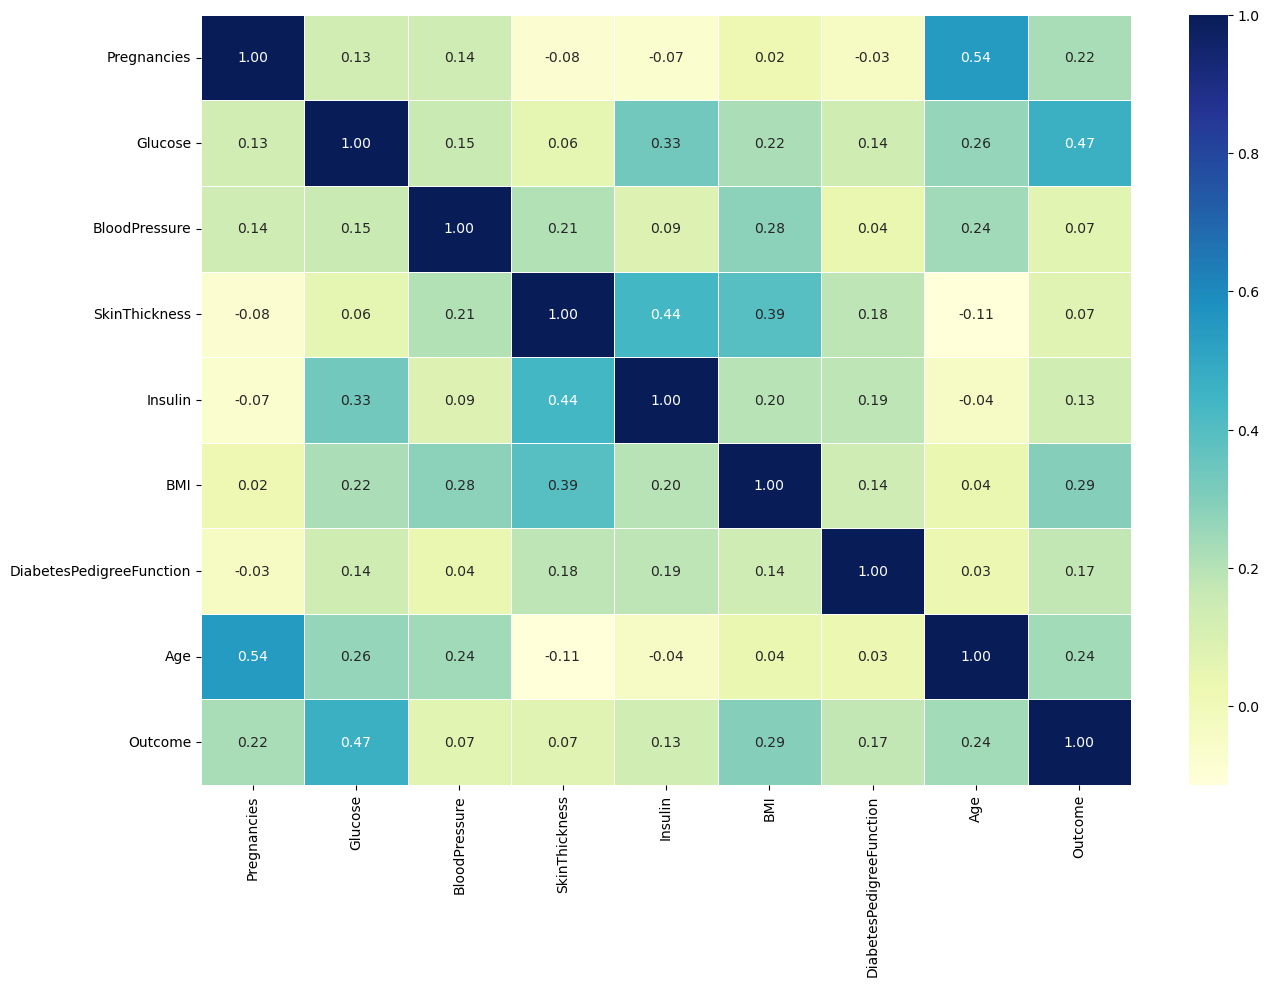

In [29]:
# Let's make our correlation matrix a little pretieir

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
               linewidth=0.5,
               fmt=".2f",
               cmap="YlGnBu");

In [30]:
fig.savefig("diabetes-seaborn-heatmap.png")

## Modeling

In [31]:
# Split data into X and y
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [32]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
# Set random seed
np.random.seed(42)

# Split into train and test set
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [35]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [36]:
y_train, len(y_train)

(60     0
 618    1
 346    0
 294    0
 231    1
       ..
 71     0
 106    0
 270    1
 435    1
 102    0
 Name: Outcome, Length: 614, dtype: int64,
 614)

Now we've got out data split into training and test sets. It's time to build a machine learning model.
 We'll train it (find the pattern) on the training set.
 and we'll test it (use the pattern) on the test set.

 we're going to try 3 different machine learning models:
 1. Logistics Regression
 2. K-Nearest Neighbours Classifier
 3. Random Forest Classifier 

In [37]:
# Put model in a dictonary
models={"Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()}

In [38]:
# Create a functions to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictonary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed to regenerate same result
    np.random.seed(42)

    # Make a dictonary to keep model scores
    model_scores={}

    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [40]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test
                          )
model_scores

/Users/mdaziz/Documents/ml-course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7207792207792207}

### Model Comparision

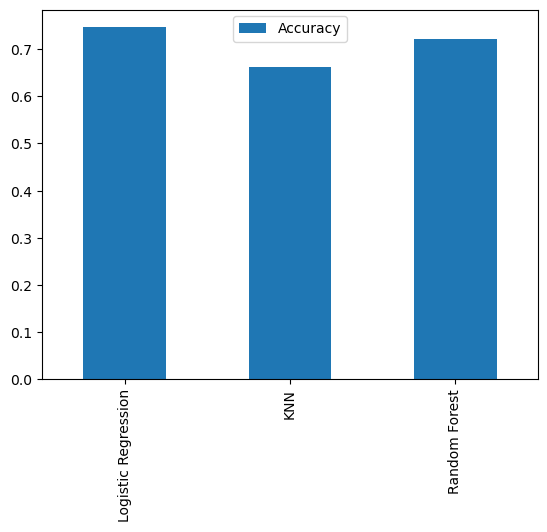

In [41]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

Now we've baseline model with default parameters of model it's time to tune the hyperparameter to check either if we can increase the model accuracy from base line